In [1]:
import json

from importnb import Notebook
with Notebook():
    from quantumsystem import qs, System, HyperSystem, IntegerSystem
    from DamageSystem import Armor, UnitDamage
    from MovementSystem import Move, MovementSpeed
    from WeaponsSystem import Weapons
    from FactionSystem import Faction

In [2]:
class Size(IntegerSystem):
    """ Size value """

class Skill(IntegerSystem):
    """ Pilot Skill value """

class TMM(IntegerSystem):
    """ Total Movement Modifier """

class Special(System):
    edge_name = "special"

In [3]:
class MechType(System):
    edge_name = "mech_type"

class MechModel(System):
    edge_name = "mech_model"

class MechRole(System):
    edge_name = "mech_role"
    
class PointValue(System):
    edge_name = "point_value"

@PointValue.sd
@Special.sd
@TMM.sd
@Size.sd
@UnitDamage.sd
@Weapons.sd
@MechRole.sd
@MechModel.sd
@MechType.sd
class MechDefinition(HyperSystem):
    """ MechDefinition """

In [4]:
@Faction.sd
@Skill.sd
@Move.sd
class Unit(HyperSystem):
    """ Unit """

class Chassis(System):
    """ Mech Chassis """

@MechDefinition.sd
@Unit.sd
@Chassis.sd
class Mech(HyperSystem):
    @classmethod
    def get_by_chassis_type(cls, chassisType):
        return [r[0] for r in qs.get(edge_name=[Chassis], terminant=chassisType)]
        
    @classmethod
    def buildMechFactory(cls, systemDefaults):
        def newMechFactory(mechName, faction="Unaligned", skill=4, xylocation=None):
            systemDefaults["Unit"]["Faction"] = faction
            systemDefaults["Unit"]["Skill"] = skill
            systemDefaults["Unit"]["Move"]["XYLocation"] = xylocation or [0, 0]
            return cls(mechName, **systemDefaults)
        return newMechFactory

In [5]:
MechFactories = {
    "Kingfisher Prime": Mech.buildMechFactory({
        "Chassis": "Kingfisher Prime",
        "Unit": {
            "Move": {  # Move System
                "Movement": {"MovementSpeed": 8, "JumpJets": "j", "DistanceMoved": 0},
                "Elevation": "0",
                "XYLocation": [0, 0]
            },
            "Faction": "Unaligned",
            "Skill": 4
        },
        "MechDefinition": {
            "MechType": "BM",
            "MechModel": "Kingfisher Prime",
            "MechRole": "Brawler",
            "Weapons": {
                "ShortRangeWeapons": {"Targeting": {"Modifier": "0", "Damage": "6"}},
                "MidRangeWeapons": {"Targeting": {"Modifier": "2", "Damage": "6"}},
                "LongRangeWeapons": {"Targeting": {"Modifier": "4", "Damage": "3"}},
                "Overheat": {"OverheatValue": "1", "OverheatDamage": "3"}
            },
            "UnitDamage": {
                "Armor": {"ArmorPlating": "9", "ArmorPlatingDamage": 0, "ArmorStructural": "7", "ArmorStructuralDamage": 0},
                "CriticalHits": {"EngineCriticalHits": "1", "FireControlCriticalHits": "1", "MPCriticalHits": "4", "WeaponsCriticalHits": "4"}
            },
            "Size": "4",
            "TMM": "1",
            "Special": json.dumps(["OMNI", "CASE", "IF01"]),
            "PointValue": "54"
        }
    }),
    "Atlas": Mech.buildMechFactory({
        "Chassis": "Atlas",
        "Unit": {
            "Move": {  # Move System
                "Movement": {"MovementSpeed": 6, "JumpJets": "null", "DistanceMoved": 0},
                "Elevation": "0",
                "XYLocation": [0, 0]
            },
            "Faction": "Unaligned",
            "Skill": 4
        },
        "MechDefinition": {
            "MechType": "BM",
            "MechModel": "Atlas",
            "MechRole": "Juggernaut",
            "Weapons": {  # Weapons System
                "ShortRangeWeapons": {"Targeting": {"Modifier": "0", "Damage": "4"}},
                "MidRangeWeapons": {"Targeting": {"Modifier": "2", "Damage": "4"}},
                "LongRangeWeapons": {"Targeting": {"Modifier": "4", "Damage": "4"}},
                "Overheat": {"OverheatValue": "1", "OverheatDamage": "3"}
            },
            "UnitDamage": {  # Unit Damage System
                "Armor": {"ArmorPlating": "3", "ArmorPlatingDamage": 0, "ArmorStructural": "8", "ArmorStructuralDamage": 0},
                "CriticalHits":  {"EngineCriticalHits": "1", "FireControlCriticalHits": "1", "MPCriticalHits": "4", "WeaponsCriticalHits": "4"}
            },
            "Size": "4",
            "TMM": "1",
            "Special": json.dumps(["AC2", "IF1", "LRM1", "REAR2"]),
            "PointValue": "52"
        }
    })
}

Received expected MSV: Cannot move unit further (15.066519173319364) than its movement speed (8)


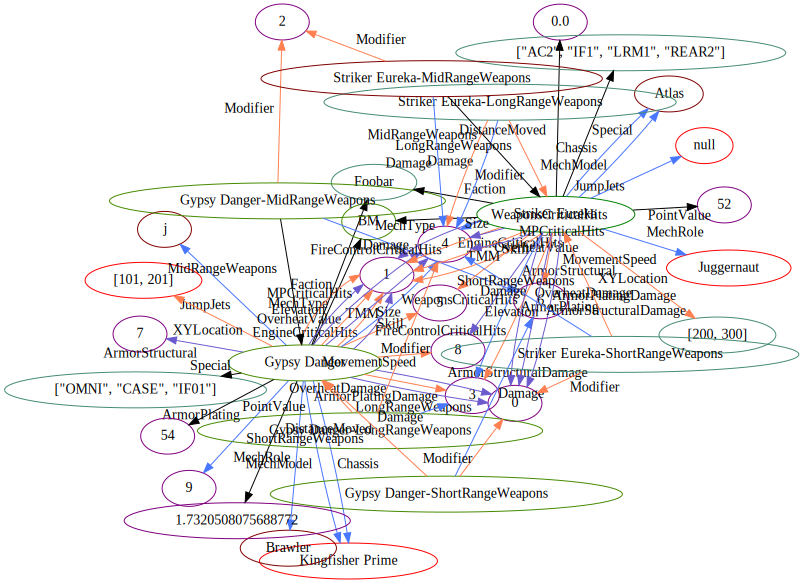

In [6]:
if __name__ == "__main__":
    from IPython.display import display

    qs.reset()
    MechFactories['Kingfisher Prime']("Gypsy Danger", "Foobar", 5, [100, 200])
    MechFactories['Atlas']("Striker Eureka", "Foobar", 5, [200, 300])
    Move.move(entity="Gypsy Danger", delta=[1, 1, 1])
    try:
        Move.move(entity="Gypsy Danger", delta=[15, 1, 1])
    except MovementSpeed.MovementSpeedViolation as msv:
        print(f"Received expected MSV: {msv}")
    assert Mech.entities() == ['Gypsy Danger', 'Striker Eureka']
    display(qs.render())